In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
import mat73

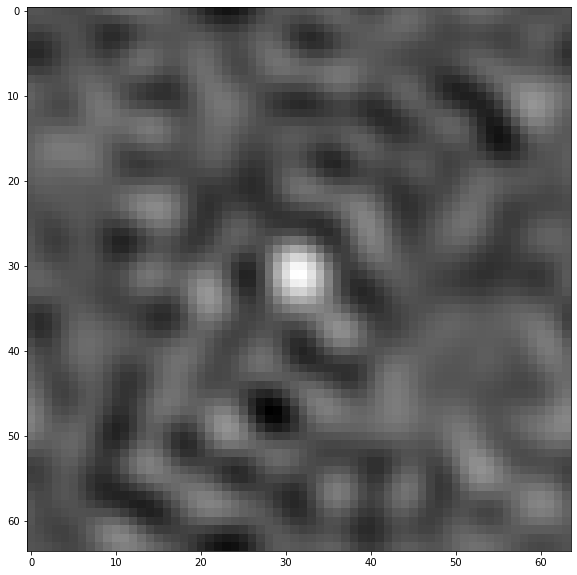

In [8]:
""" Function to import used to unpack rows of FFT-field"""
def exp_expand(data,shape):
    x = np.arange(shape[0]) - shape[0] / 2
    y = np.arange(shape[1]) - shape[1] / 2
    X, Y = np.meshgrid(x, y)
    bg=np.zeros((shape[0]*shape[1],))+0j
    X=np.reshape(np.fft.fftshift(X),(shape[0]*shape[1]))
    Y=np.reshape(np.fft.fftshift(Y),(shape[0]*shape[1]))
    RHO=X**2+Y**2
    Inds=np.argsort(RHO)
    Inds=np.sort(Inds[:data.shape[0]])

    bg[Inds[:data.shape[0]]]=data
    bg=np.reshape(bg,(shape[0],shape[1]))
  
    return bg


# Load a matfile with "downsized" ROI:s around particles found in the experimental data 
# Download mat-file from shared drive to your private one if to run in Colab!
filePath = "C:\\Users\isakb\OneDrive - Chalmers University of Technology\Dokument\F\F3\Kandidatarbete\Labbets MATLAB-kod\Data\PSL240_noGold_TrackIm\PSL240_noGoldEvery1_1_movie_1CompletedTraces.mat"

expData = mat73.loadmat(filePath)
expData = expData['CompletedTraces']

outPutShape = [64, 64]
realM = np.zeros((64, 64, len(expData)))
imM = 1j * np.ones((64, 64, len(expData)))
savedParticles = realM + imM

# This loop unpacks and stores all fields found in the processed video in an 3d-array
for i in range(len(expData)):

    roiData = expData[i]['ROI'][0]
    roiData = np.array(roiData)
    roiData = roiData[5, :]

    fftOfParticle = exp_expand(roiData, outPutShape)
    particleROI = np.fft.ifft2(fftOfParticle)
    particleROI = np.fft.fftshift(particleROI)

    savedParticles[:, :, i] = particleROI

# Example of how a field could look
imToShow = np.imag(savedParticles[:, :, 52]) 
plt.imshow(imToShow, cmap = "gray")
plt.show()
